In [22]:
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import cv2
%matplotlib inline
dir_path='mpii_human_pose_v1\\output_images\\'
'''
0 - r ankle, 1 - r knee, 2 - r hip, 
3 - l hip, 4 - l knee, 5 - l ankle,
6 - pelvis, 7 - thorax, 8 - upper neck, 9 - head top, 
10 - r wrist, 11 - r elbow, 12 - r shoulder, 
13 - l shoulder, 14 - l elbow, 15 - l wrist)
'''
pairs=[[7,8],[8,9],[6,5],[5,4],[6,0],[7,0],[0,1],[1,2],[2,3],[10,11],[11,12],[15,14],[14,13],[12,1],[13,1]]

In [23]:
raw_datas= open('train_data\\new_data.json').readlines()
data=json.loads(raw_datas[20].strip())

In [24]:
def draw_bones(img,joints):
    for line in pairs:
        a=(int(joints[line[0]][0]),int(joints[line[0]][1]))
        b=(int(joints[line[1]][0]),int(joints[line[1]][1]))
        cv2.line(img,a,b,(255,0,0),5)
    return img

20-017052412.jpg
0 6
1 7
2 8
3 9
4 0
5 1
6 2
7 3
8 4
9 5
10 10
11 11
12 12
13 13
14 14
15 15


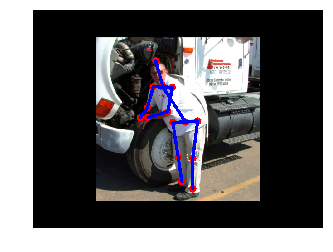

In [25]:
print(data['filename'])
img = cv2.imread(dir_path+data['filename'])
joints_pos=data['joint_pos']
joints_store=np.zeros([16,2])
for i,joint in zip(range(0,16),joints_pos):
    print(str(i)+" "+str(joint))
    x=int(joints_pos[joint][0])
    y=int(joints_pos[joint][1])
    single_joint=np.array([x,y])
    cv2.circle(img,(x,y), 8, (0,0,255), -1)
    joints_store[i]=single_joint
img=draw_bones(img,joints_store)
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

